## Reto 3: Gráficas de Dispersión

### 1. Objetivos:
    - Aprender a generar e interpretar gráficas de dispersión
    - Utilizar gráficas de dispersión para complementar el análisis hecho con la matriz de correlación

---
    
### 2. Desarrollo:

Espero que haya quedado claro en el Ejemplo pasado que las gráficas de dispersión pueden ser extremadamente útiles para encontrar incosistencias, errores y valores atípicos en nuestro dataset.

Vamos a complementar el análisis realizado en el Reto pasado con unas gráficas de dispersión. El objetivo de este Reto es utilizar todas las herramientas que hemos acumulado hasta el momento para preparar nuestro dataset para realizar predicciones con él. Vamos a volver a utilizar el dataset 'wine_quality_red-clean.csv'. Realiza los siguientes pasos:

1. Vuelve a generar tu matriz de correlaciones para tenerla disponible
2. Realiza gráficas de dispersión de los pares de variables que parezcan más prometedores (en los que la fuerza de la correlación sea más fuerte)
3. También realiza gráficas de dispersión de los pares de variables que no tengan un coeficiente de correlación alto, **pero** que tú creas intuitivamente que *deberían* de tener una correlación.
4. Utilizando estas gráficas de dispersión, y complementando el análisis con promedios, medianas, desviación estándar, boxplots e histogramas, elimina del dataset los valores que consideres como atípicos.
5. Crea una nueva matriz de correlación para ver si tus coeficientes han sido modificados o no.
6. Comenta con tus compañeros y la experta tus hallazgos.

Mounted at /content/drive


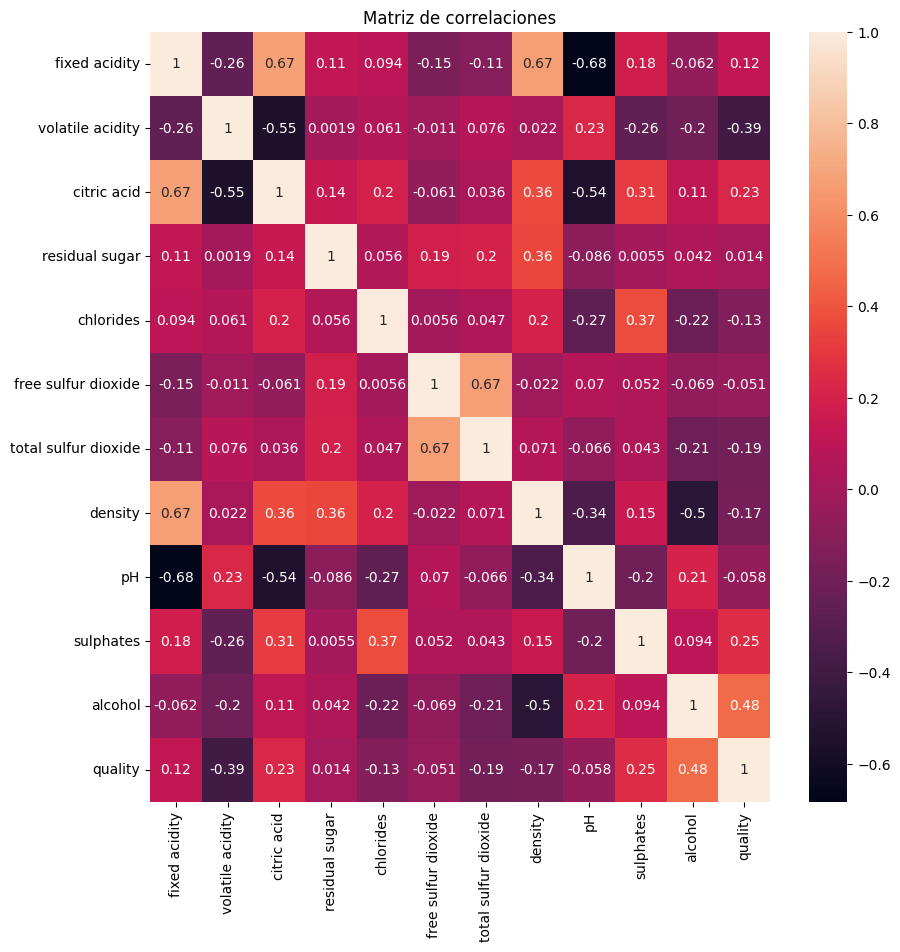

In [2]:
#leer dataset /content/drive/MyDrive/Colab Notebooks/Datasets/winequality-red.csv
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/winequality-red.csv', delimiter=';') # Changed 'delimeter' to 'delimiter'
df.head()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Matriz de correlaciones')
plt.show()

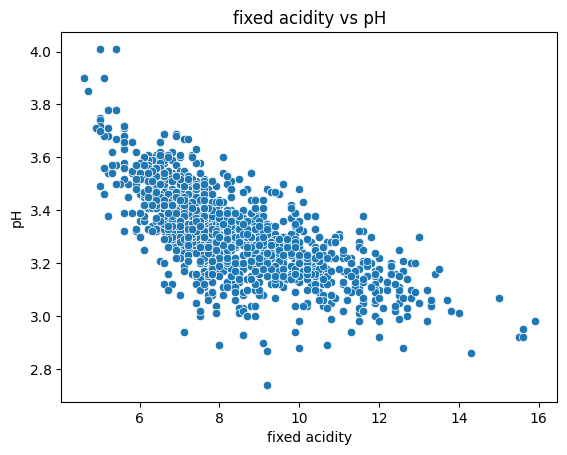

In [7]:
#crear grafica de dispersion con correlacion negativa
# Before plotting, check if the required columns exist in your DataFrame.
required_columns = ['fixed acidity', 'pH']
if all(col in df.columns for col in required_columns):
  sns.scatterplot(x='fixed acidity', y='pH', data=df)
  plt.title('fixed acidity vs pH')
  plt.show()
else:
  missing_columns = [col for col in required_columns if col not in df.columns]
  print(f"Error: The following columns are missing in your DataFrame: {missing_columns}")
  print("Please check your data loading process.")

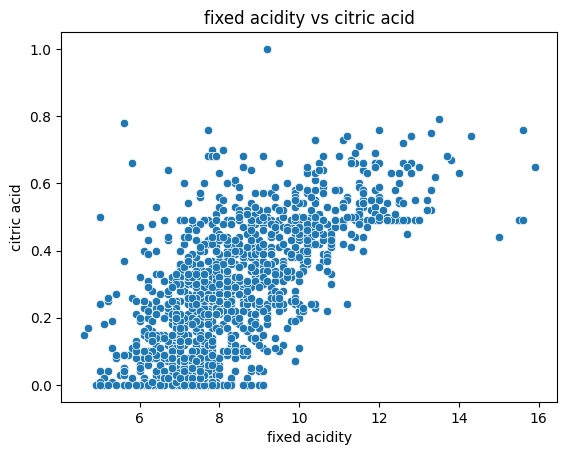

In [8]:
#fixed acidity vs citric acid
sns.scatterplot(x='fixed acidity', y='citric acid', data=df)
plt.title('fixed acidity vs citric acid')
plt.show()


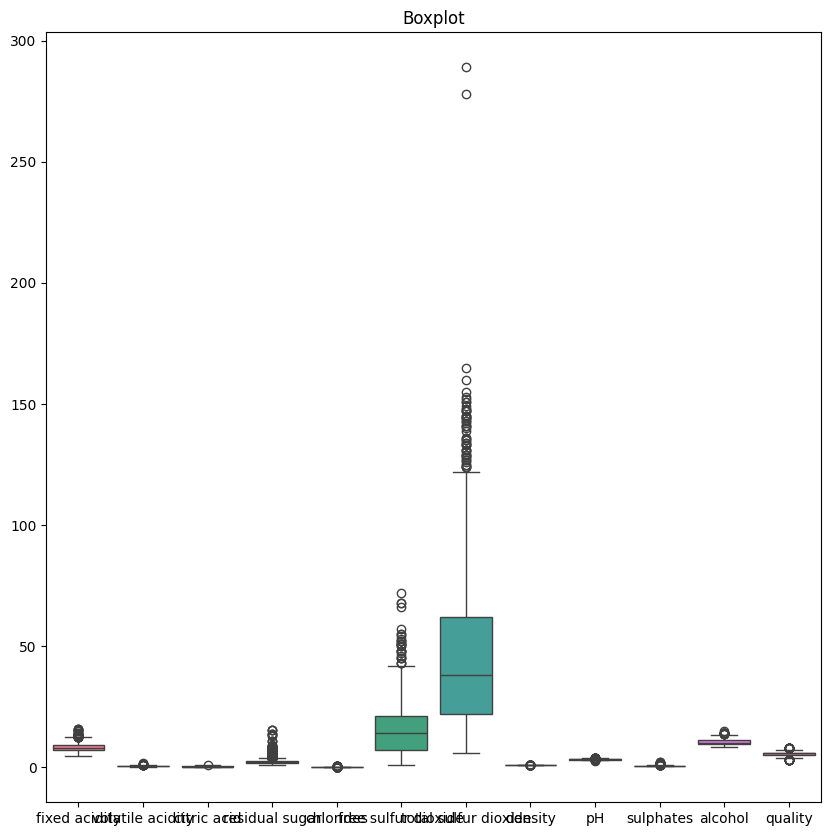

In [9]:
#valoires atipicos
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.title('Boxplot')
plt.show()

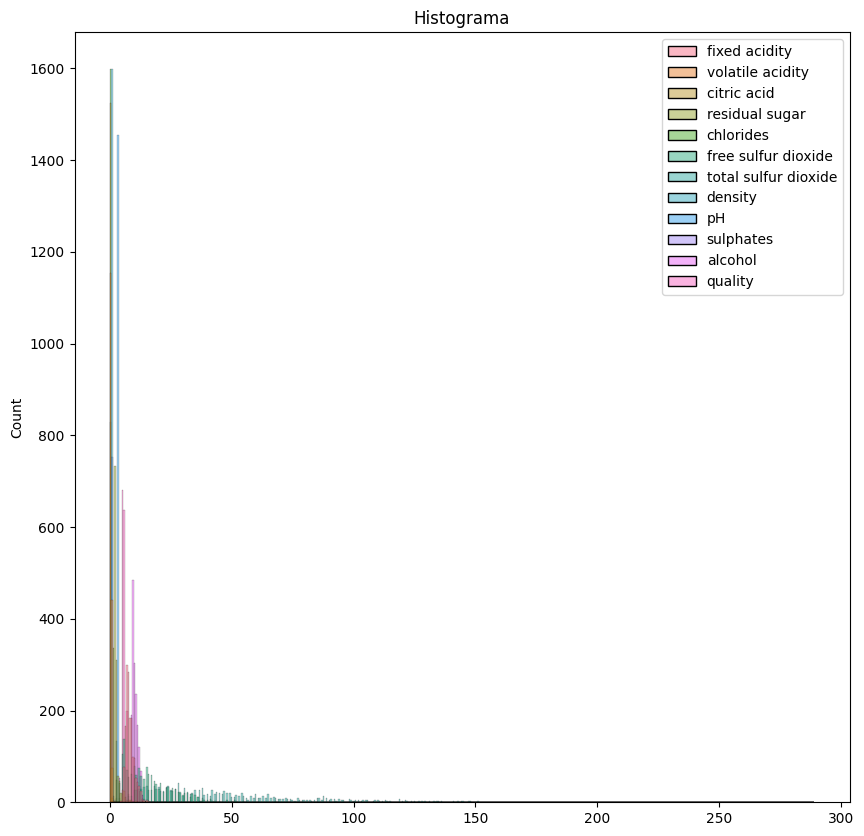

In [10]:
#histograma
plt.figure(figsize=(10,10))
sns.histplot(data=df)
plt.title('Histograma')
plt.show()

In [11]:
#filtro
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_filtered.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


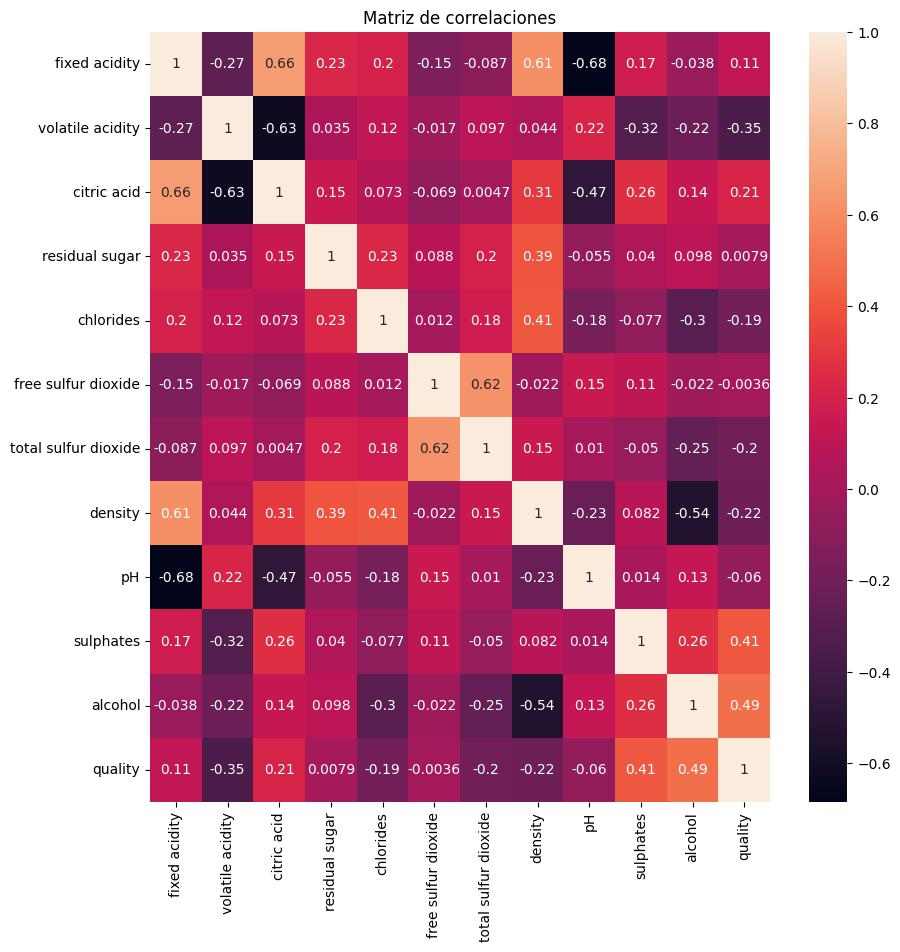

In [12]:
NUEVA_MATRIX=df_filtered.corr()
plt.figure(figsize=(10,10))
sns.heatmap(NUEVA_MATRIX, annot=True)
plt.title('Matriz de correlaciones')
plt.show()